In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Create a datetime parser function
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [ ]:
# Create a adf test function
def perform_adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: %f" % result[0])
    print("P-value: %f" % result[1])

In [ ]:
# Load the data on colab
from google.colab import files
uploaded = files.upload()

Saving catfish.csv to catfish (1).csv


In [ ]:
# Get the data 
series = pd.read_csv("catfish.csv", parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004, 1, 1): ]
series = series.diff().diff().dropna()

In [ ]:
# Check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
P-value: 0.000000


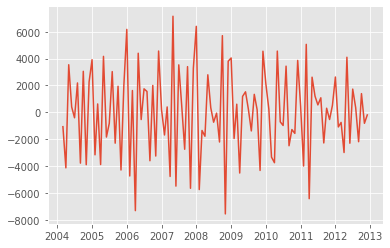

In [ ]:
# Plot the data
plt.plot(series)

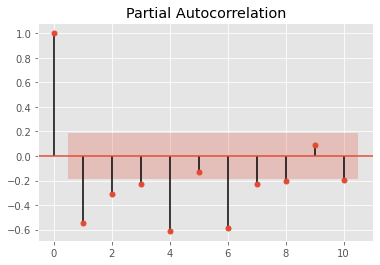

In [ ]:
# Plot the pacf 
plot_pacf(series, lags = 10)
plt.show()

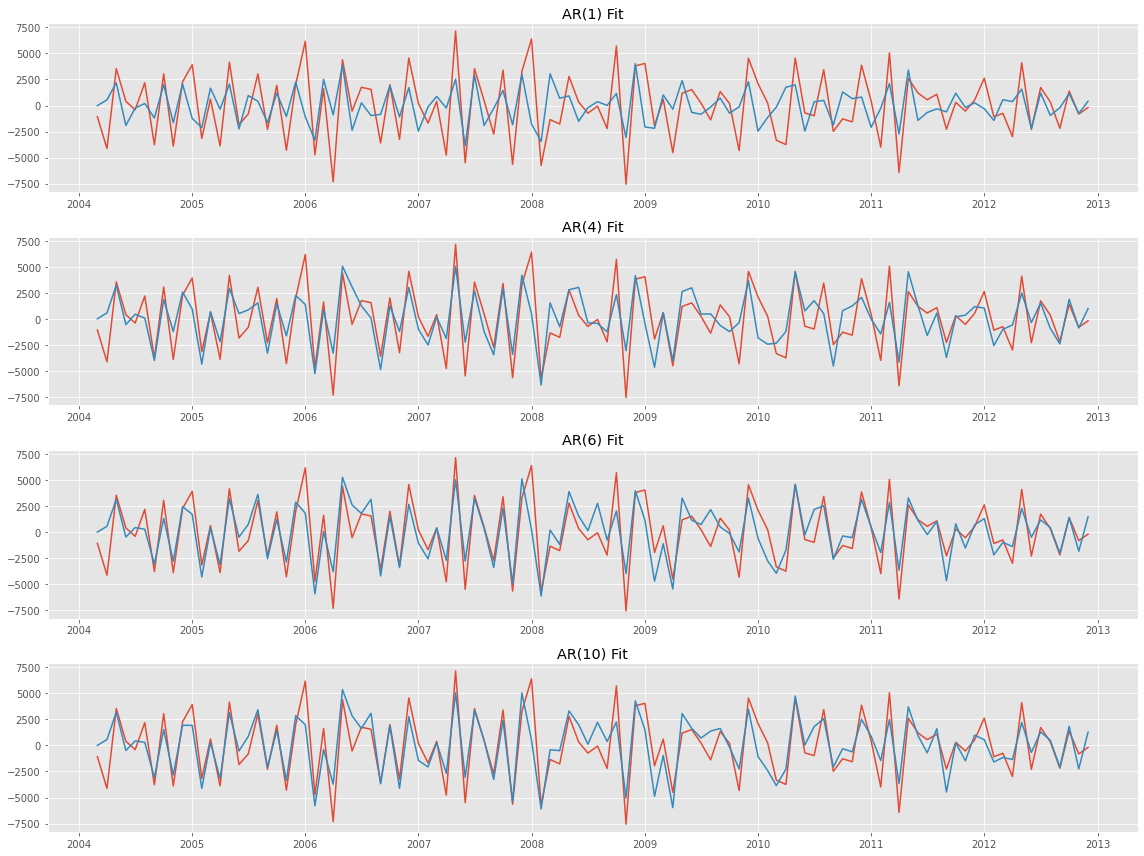

In [ ]:
# Either AR(1), AR(4), AR(6), or AR(10)
plt.figure(figsize = (16, 12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(series, order = (ar_order, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4, 1, idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title("AR(%s) Fit" %ar_order)

plt.tight_layout()

Each model has:
> a log likelihood ($l$)

> a number of parameters ($k$)

> a number of samples used for fitting ($n$)

> AIC(Akaike Information Criterion) = 2$k$ - 2$l$

> Lower AIC via higher log likelihood or less parameters

> BIC(Bayesian information criterion) = $\ln(n)k$ - 2$l$

> Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [ ]:
# AIC comparison
for ar_order in ar_orders:
    print("AIC for AR(%s): %s" %(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.8563100724386
AIC for AR(4): 1927.4507591020924
AIC for AR(6): 1899.6302659535886
AIC for AR(10): 1902.2647912111736


Based on AIC criteria, pick AR(6)

In [ ]:
# BIC comparison
for ar_order in ar_orders:
    print("BIC for AR(%s): %s" %(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.846627354775
BIC for AR(4): 1943.4313936667647
BIC for AR(6): 1920.9377787064852
BIC for AR(10): 1934.2260603405184


Based on BIC criteria, pick AR(6)